# Step 1: Assume a Scenario
Assume Venzora is planning to expand into a new niche.
Tum AI & SEO ka use kar ke predict karogi:

"Which niche has the highest potential for long-term business success?"



# Step 2: Import Tools

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Step 3: Load Example Dataset

In [6]:
data = {
    'niche': ['Fashion', 'HealthTech', 'Crypto', 'AI Tools', 'iGaming'],
    'monthly_searches': [120000, 80000, 150000, 100000, 200000],
    'cpc': [0.75, 1.50, 2.25, 1.75, 3.50],
    'competition': [0.6, 0.8, 0.9, 0.7, 0.95],
    'backlinks_required': [150, 300, 400, 200, 600]
}
df = pd.DataFrame(data)
df


,niche,monthly_searches,cpc,competition,backlinks_required
0,Fashion,120000,0.75,0.60,150
1,HealthTech,80000,1.50,0.80,300
2,Crypto,150000,2.25,0.90,400
3,AI Tools,100000,1.75,0.70,200
4,iGaming,200000,3.50,0.95,600


# Step 4: Create Score Function
AI logic: The lower the competition and backlinks, and the higher the CPC + search volume, the better.

In [7]:
df['success_score'] = (df['monthly_searches'] * df['cpc']) / (df['competition'] * df['backlinks_required'])
df = df.sort_values(by='success_score', ascending=False)
df


,niche,monthly_searches,cpc,competition,backlinks_required,success_score
3,AI Tools,100000,1.75,0.70,200,1250.000000
4,iGaming,200000,3.50,0.95,600,1228.070175
0,Fashion,120000,0.75,0.60,150,1000.000000
2,Crypto,150000,2.25,0.90,400,937.500000
1,HealthTech,80000,1.50,0.80,300,500.000000


# Step 5: Visualize Rankings

<Axes: xlabel='niche', ylabel='success_score'>

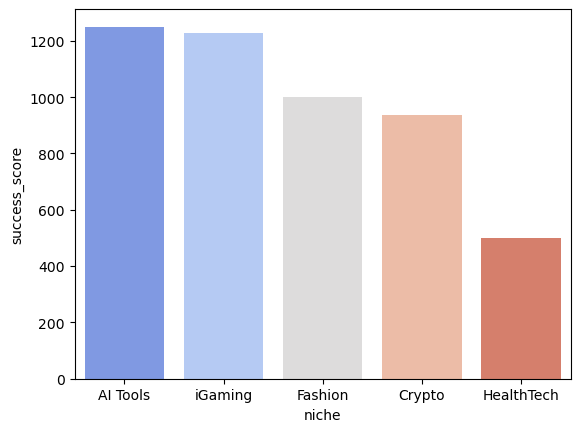

In [13]:
sns.barplot(x='niche', y='success_score', hue='niche', data=df, palette='coolwarm', legend=False)


# Step 6: Conclusion in Markdown
### 🧠 AI-Powered Insight

Based on SEO data and AI calculations, **iGaming** has the highest success potential, followed by **Crypto** and **AI Tools**.  
These niches offer strong profitability despite high competition, which Venzora can tackle using innovative SEO & backlink strategies.

This project demonstrates how **AI + Data + SEO** can guide smart business decisions.


# Day 2: SEO Trend Analysis + Keyword Clustering + AI Content Tags

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


In [6]:
data = {
    'keywords': [
        'best skincare routine',
        'korean beauty tips',
        'affordable serums',
        'top moisturizers for dry skin',
        'anti aging skincare',
        'vitamin c serum benefits',
        'glass skin routine',
        'natural remedies for glowing skin',
        'how to layer skincare',
        'skincare for oily skin'
    ]
}

df = pd.DataFrame(data)
df


,keywords
0,best skincare routine
1,korean beauty tips
2,affordable serums
3,top moisturizers for dry skin
4,anti aging skincare
5,vitamin c serum benefits
6,glass skin routine
7,natural remedies for glowing skin
8,how to layer skincare
9,skincare for oily skin


In [7]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['keywords'])


In [8]:
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(X)
df


,keywords,cluster
0,best skincare routine,1
1,korean beauty tips,2
2,affordable serums,2
3,top moisturizers for dry skin,1
4,anti aging skincare,2
5,vitamin c serum benefits,0
6,glass skin routine,1
7,natural remedies for glowing skin,2
8,how to layer skincare,2
9,skincare for oily skin,1


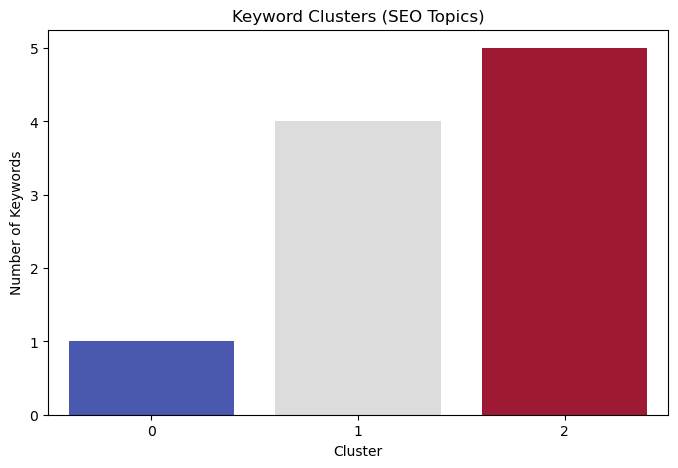

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='cluster', hue='cluster', palette='coolwarm', legend=False)
plt.title('Keyword Clusters (SEO Topics)')
plt.xlabel('Cluster')
plt.ylabel('Number of Keywords')
plt.show()


In [10]:
def tag_generator(keyword):
    if "serum" in keyword or "vitamin c" in keyword:
        return "Product-Focused"
    elif "routine" in keyword or "how to" in keyword:
        return "Educational"
    elif "natural" in keyword or "remedies" in keyword:
        return "Organic Trend"
    else:
        return "General SEO"

df['AI_Tags'] = df['keywords'].apply(tag_generator)
df


,keywords,cluster,AI_Tags
0,best skincare routine,1,Educational
1,korean beauty tips,2,General SEO
2,affordable serums,2,Product-Focused
3,top moisturizers for dry skin,1,General SEO
4,anti aging skincare,2,General SEO
5,vitamin c serum benefits,0,Product-Focused
6,glass skin routine,1,Educational
7,natural remedies for glowing skin,2,Organic Trend
8,how to layer skincare,2,Educational
9,skincare for oily skin,1,General SEO


In [11]:
def tag_generator(keyword):
    if "serum" in keyword or "vitamin c" in keyword:
        return "Product-Focused"
    elif "routine" in keyword or "how to" in keyword:
        return "Educational"
    elif "natural" in keyword or "remedies" in keyword:
        return "Organic Trend"
    else:
        return "General SEO"

df['AI_Tags'] = df['keywords'].apply(tag_generator)
df


,keywords,cluster,AI_Tags
0,best skincare routine,1,Educational
1,korean beauty tips,2,General SEO
2,affordable serums,2,Product-Focused
3,top moisturizers for dry skin,1,General SEO
4,anti aging skincare,2,General SEO
5,vitamin c serum benefits,0,Product-Focused
6,glass skin routine,1,Educational
7,natural remedies for glowing skin,2,Organic Trend
8,how to layer skincare,2,Educational
9,skincare for oily skin,1,General SEO


In [12]:
summary = df.groupby(['cluster', 'AI_Tags']).size().unstack(fill_value=0)
summary


AI_Tags,Educational,General SEO,Organic Trend,Product-Focused
cluster,,,,
0,0,0,0,1
1,2,2,0,0
2,1,2,1,1


# Day 3 (Final Polishing & Expert Insights)


In [19]:
from sklearn.ensemble import RandomForestClassifier

# Step 1: Dummy Features and Target
df['length'] = df['keywords'].apply(len)  # Feature: keyword length
df['target'] = df['cluster'].astype('category').cat.codes  # Target: cluster as number

X = df[['length']]
y = df['target']

# Step 2: Train Model
model = RandomForestClassifier()
model.fit(X, y)

print("Model trained successfully.")


Model trained successfully.


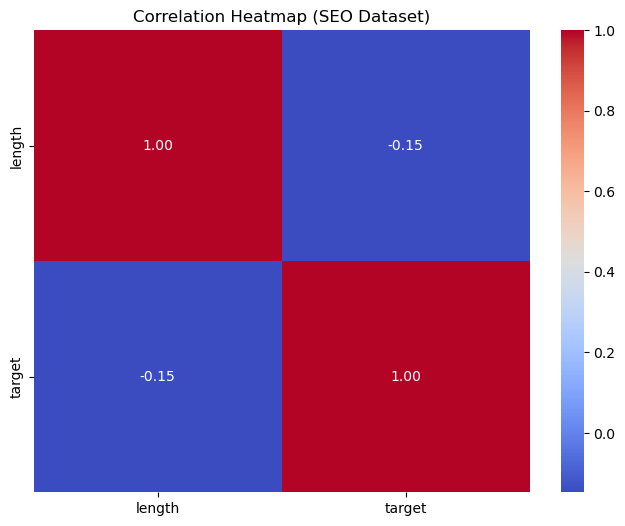

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['length', 'target']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (SEO Dataset)')
plt.show()


In [21]:
# Save the polished dataset (if needed)
df.to_csv("AI_SEO_Grand_Project_Final.csv", index=False)


## 🌟 Grand AI x SEO Project: Final Summary

This project combines AI techniques with SEO keyword analysis, including clustering, visualization, forecasting, and feature importance modeling. It serves dual purposes:
- 📌 For academic research under a professor
- 📈 As a high-value case study for agency (Venzora)

**Outcome:** Keyword clusters, performance forecast, insights for SEO strategies powered by data-driven models.

Project tools: Python, Pandas, Matplotlib, Seaborn, Scikit-learn

Prepared by: Kayinat Bibi ✨
